
Análisis del Modelo de Regresión Lineal:
- La pendiente del modelo (coeficiente) es: -0.96
- El intercepto del modelo es: 26.88

Interpretación del comportamiento:
- Los editores de código más populares, como Visual Studio Code, tienen un valor proporcional más alto en términos de porcentaje de uso.
- A medida que descendemos en el ranking de popularidad, los porcentajes de uso disminuyen.
- El modelo de regresión muestra una relación negativa, lo que indica que a medida que el ranking de popularidad disminuye, el porcentaje de uso también disminuye.
- Esto sugiere que la popularidad de un editor de código está correlacionada con su demanda en el mercado, reflejada en el porcentaje de uso.


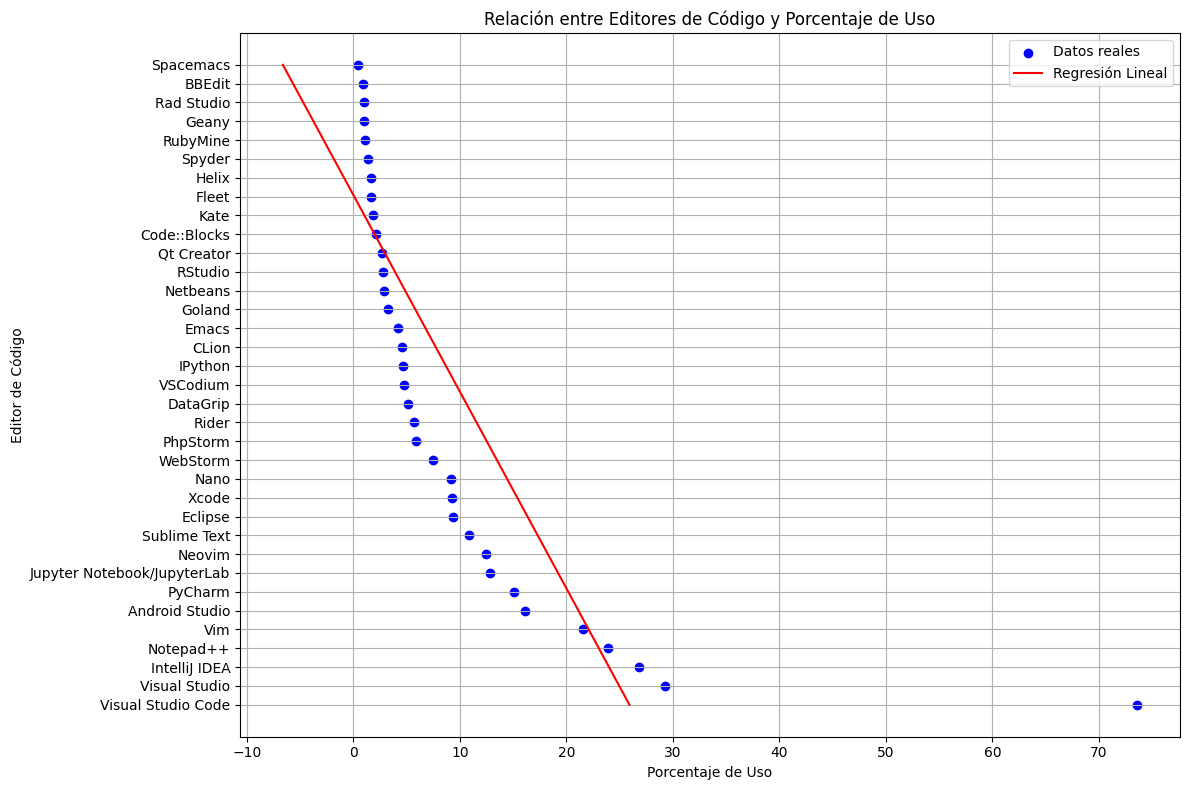

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Leer el archivo CSV
archivo_csv = "EntornoDesarrollo.csv"  # Cambia esto a la ruta de tu archivo real
df = pd.read_csv(archivo_csv)

# Limpiar los datos de la columna "Porcentaje" (remover '%')
df['Porcentaje'] = df['Porcentaje'].str.rstrip('%').astype(float)

# Ordenar por porcentaje y resetear el índice
df = df.sort_values(by="Porcentaje", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Crear variables independientes y dependientes para el modelo
X = df[["Ranking"]].values  # Variable independiente (Ranking)
y = df["Porcentaje"].values  # Variable dependiente (Porcentaje)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Analizar el modelo y generar un análisis textual
pendiente = model.coef_[0]
intercepto = model.intercept_

# Imprimir análisis del modelo
print("\nAnálisis del Modelo de Regresión Lineal:")
print(f"- La pendiente del modelo (coeficiente) es: {pendiente:.2f}")
print(f"- El intercepto del modelo es: {intercepto:.2f}")
print("\nInterpretación del comportamiento:")
print("- Los editores de código más populares, como Visual Studio Code, tienen un valor proporcional más alto en términos de porcentaje de uso.")
print("- A medida que descendemos en el ranking de popularidad, los porcentajes de uso disminuyen.")
print("- El modelo de regresión muestra una relación negativa, lo que indica que a medida que el ranking de popularidad disminuye, el porcentaje de uso también disminuye.")
print("- Esto sugiere que la popularidad de un editor de código está correlacionada con su demanda en el mercado, reflejada en el porcentaje de uso.")

# Configurar el gráfico con los nombres de los editores en el eje y
plt.figure(figsize=(12, 8))
plt.scatter(df["Porcentaje"], df["Editor de Código"], color="blue", label="Datos reales")
plt.plot(y_pred, df["Editor de Código"], color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Porcentaje de Uso")
plt.ylabel("Editor de Código")
plt.title("Relación entre Editores de Código y Porcentaje de Uso")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
